Import necessary libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset (adjust the file path as needed)

In [65]:
population_data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv', skiprows=4)
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [68]:
population_data.shape

(266, 69)

Extract relevant data for the year 2022 and drop rows with missing values.

In [73]:
population_2022 = population_data[['Country Name', '2022']].dropna()
population_2022.head()

,Country Name,2022
0,Aruba,106445.0
1,Africa Eastern and Southern,720859132.0
2,Afghanistan,41128771.0
3,Africa Western and Central,490330870.0
4,Angola,35588987.0


Sort by population in 2022 and select the top 10 countries.

In [76]:
top_10_countries = population_2022.sort_values(by='2022', ascending=False).head(10)

 --- 1. Bar Chart ---

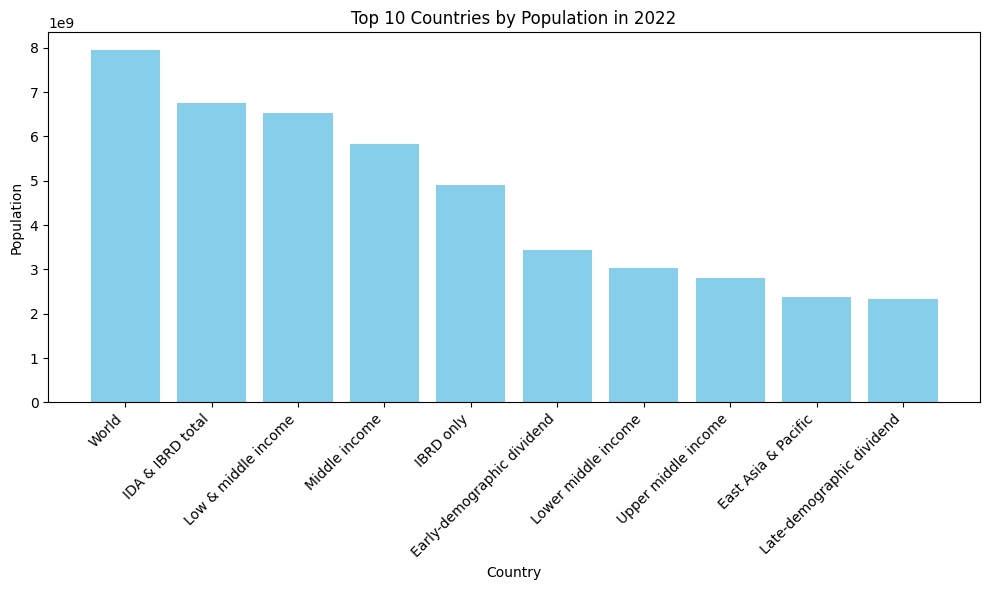

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country Name'], top_10_countries['2022'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Population in 2022')
plt.xlabel('Country')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

--- 2. Histogram ---

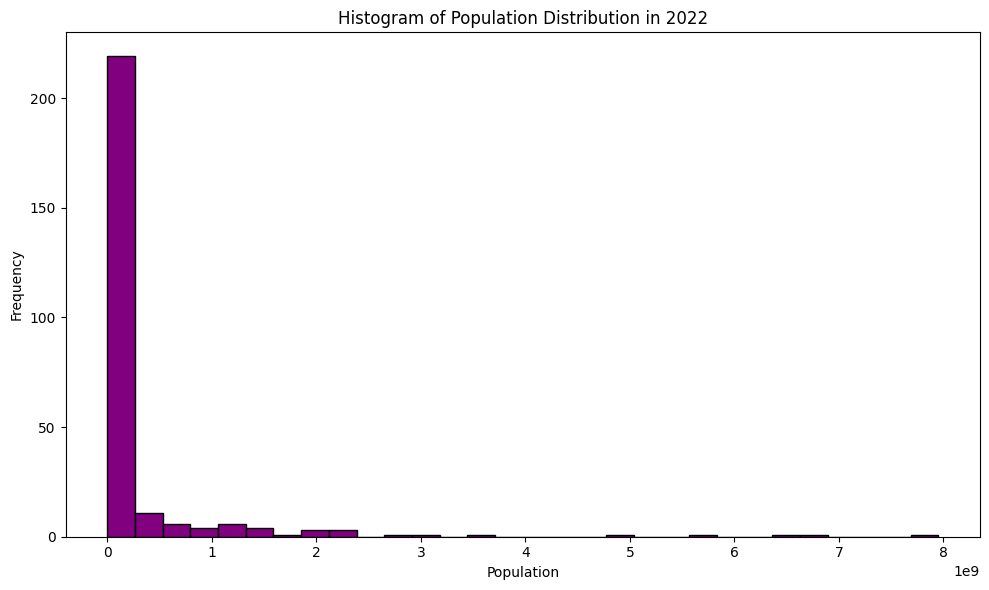

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(population_2022['2022'], bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Population Distribution in 2022')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 --- 3. Line Plot (Population trend of top country) ---


Select data for the top country

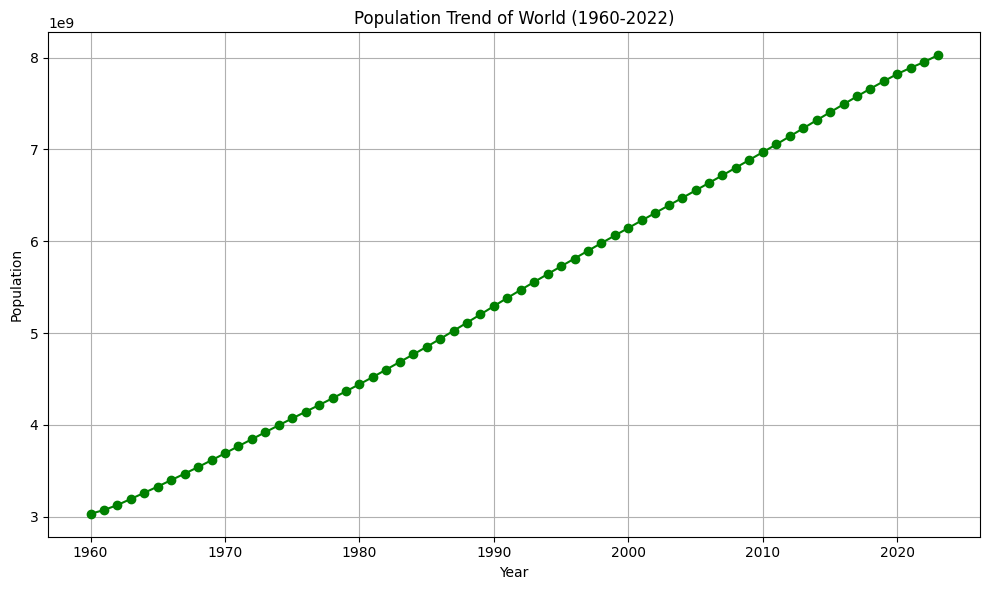

In [79]:
top_country = top_10_countries.iloc[0]['Country Name']
country_data = population_data[population_data['Country Name'] == top_country].iloc[:, 4:-1].T
country_data.columns = ['Population']
country_data.index = country_data.index.astype(int)  # Convert index to int for years

plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data['Population'], marker='o', color='green')
plt.title(f'Population Trend of {top_country} (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

 --- 4. Pie Chart ---

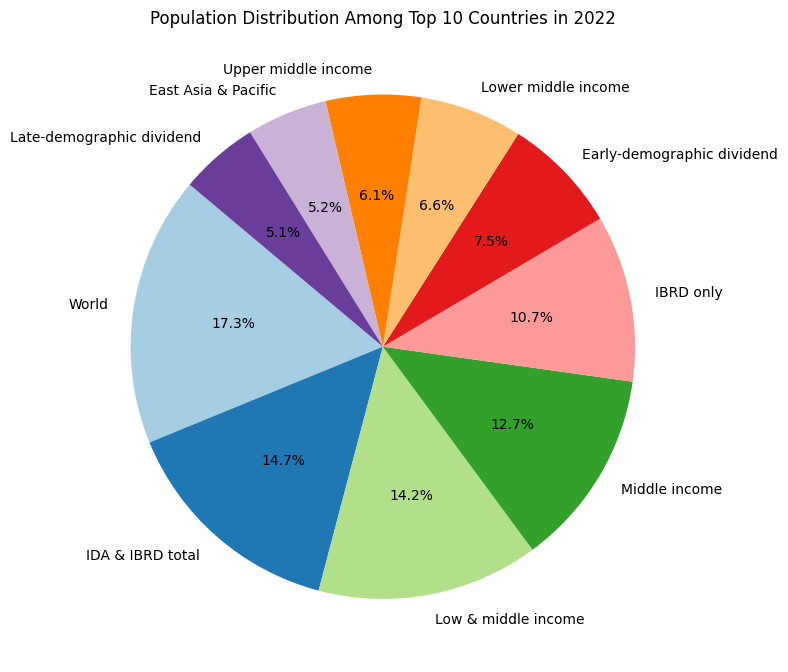

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries['2022'], labels=top_10_countries['Country Name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Population Distribution Among Top 10 Countries in 2022')
plt.tight_layout()
plt.show()